## Esercizi 05.03.25

## 1.

## Manipolazione di un DataFrame di vendite
Abbiamo un dataset con date di vendita e importi. Dobbiamo:

1.1 Creare una colonna con il numero di giorni trascorsi dall'ultima vendita;

1.2 Aggiungere le date mancanti e riempire le vendite con 0;

1.3 Creare una colonna con l'importo delle vendite di 7 giorni prima;

1.4 Creare una colonna con la media delle vendite dei 7 giorni precedenti;

1.5 Convertire i dati a frequenza settimanale, sommando le vendite per ogni settimana.

In [10]:
import pandas as pd
import numpy as np

# Dati originali
data = {
    "date": [
        "2023-05-01", "2023-05-02",
        "2023-05-05", "2023-05-07",
        "2023-05-10", "2023-05-15",
        "2023-05-20", "2023-05-25",
        "2023-05-30", "2023-05-31"
    ],
    "sales_amount": [100, 150, 200, 130, 180, 250, 300, 220, 270, 310]
}

# Creazione DataFrame
df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"])

# Aggiungere giorni mancanti con sales_amount = 0
df = df.set_index("date").asfreq("D", fill_value=0).reset_index()

# Calcolare i giorni dall'ultima vendita
df["days_since_last_sale"] = df["date"].diff().dt.days.fillna(0).astype(int)

# Aggiungere colonna con valore di 7 giorni prima
df["sales_lag_7"] = df["sales_amount"].shift(7).fillna(0)

# Calcolare la media mobile dei 7 giorni precedenti
df["sales_mean_7"] = df["sales_amount"].rolling(window=7).mean().fillna(0)

# Convertire la frequenza a settimanale, sommando le vendite
df_weekly = df.resample("W", on="date").sum(numeric_only=True)

# Visualizzare i dati trasformati
print(df.head(10))
print(df_weekly.head())

        date  sales_amount  days_since_last_sale  sales_lag_7  sales_mean_7
0 2023-05-01           100                     0          0.0      0.000000
1 2023-05-02           150                     1          0.0      0.000000
2 2023-05-03             0                     1          0.0      0.000000
3 2023-05-04             0                     1          0.0      0.000000
4 2023-05-05           200                     1          0.0      0.000000
5 2023-05-06             0                     1          0.0      0.000000
6 2023-05-07           130                     1          0.0     82.857143
7 2023-05-08             0                     1        100.0     68.571429
8 2023-05-09             0                     1        150.0     47.142857
9 2023-05-10           180                     1          0.0     72.857143
            sales_amount  days_since_last_sale  sales_lag_7  sales_mean_7
date                                                                     
2023-05-07      

1.1 Il dataset originale contiene solo le date in cui è avvenuta una vendita. Dobbiamo calcolare, per ogni giorno, quanti giorni sono trascorsi dalla vendita precedente. Usiamo .diff() sulla colonna delle date per ottenere la differenza in giorni tra ogni riga e quella precedente;

1.2 Se un giorno non è presente nel dataset, significa che non ci sono state vendite. Dobbiamo creare un intervallo di date completo e impostare le vendite a 0 per i giorni mancanti. Usiamo pd.date_range() per creare un intervallo completo. Usiamo .reindex() per inserire i valori mancanti;

1.3 Per confrontare il valore con quello di una settimana prima, usiamo .shift(7);

1.4 Vogliamo calcolare la media mobile sui 7 giorni precedenti, quindi usiamo .rolling(7).mean();

1.5 Vogliamo raggruppare i dati settimanalmente e sommare le vendite per ogni settimana. Usiamo .resample("W").sum() per ottenere la somma settimanale.

## 2.

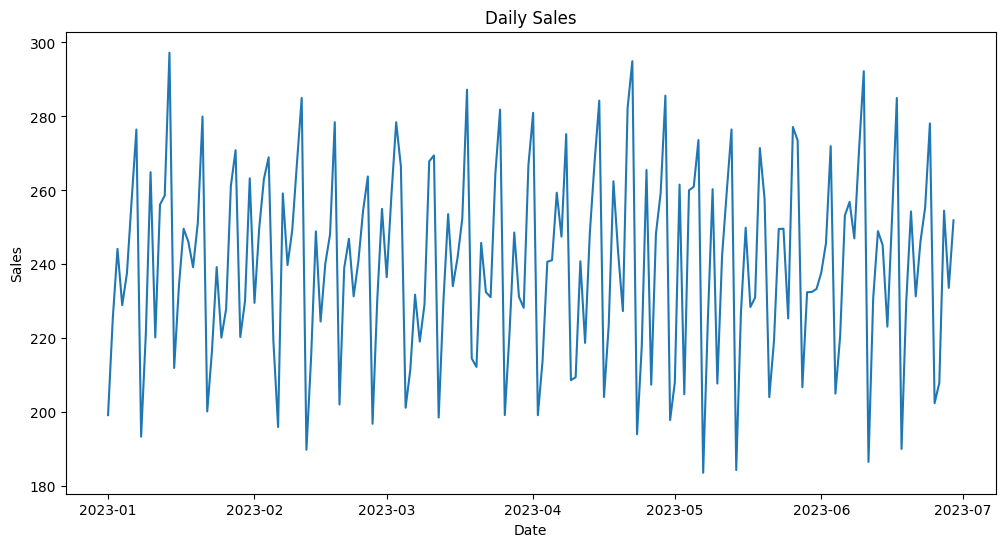

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

date_range = pd.date_range(start="2023-01-01", periods=180, freq="D")
values = np.array([200, 220, 250, 230, 240, 260, 280], dtype=float)
sales = np.tile(values, len(date_range) // 7 + 1)[:len(date_range)]
sales += np.random.normal(0, 10, len(sales))
df = pd.DataFrame({"date": date_range, "sales": sales})
df.set_index("date", inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="sales")
plt.title("Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

## Previsione delle vendite con Exponential Smoothing

Abbiamo dati giornalieri sulle vendite, eseguiamo i seguenti passaggi:

2.1  Analisi e preparazione dei dati;

2.2 Definizione del modello di Exponential Smoothing;

2.3 Generazione della previsione;

2.4 Visualizzazione della previsione;

2.5 Stampa dei valori previsti.

In [12]:
!pip install statsmodels

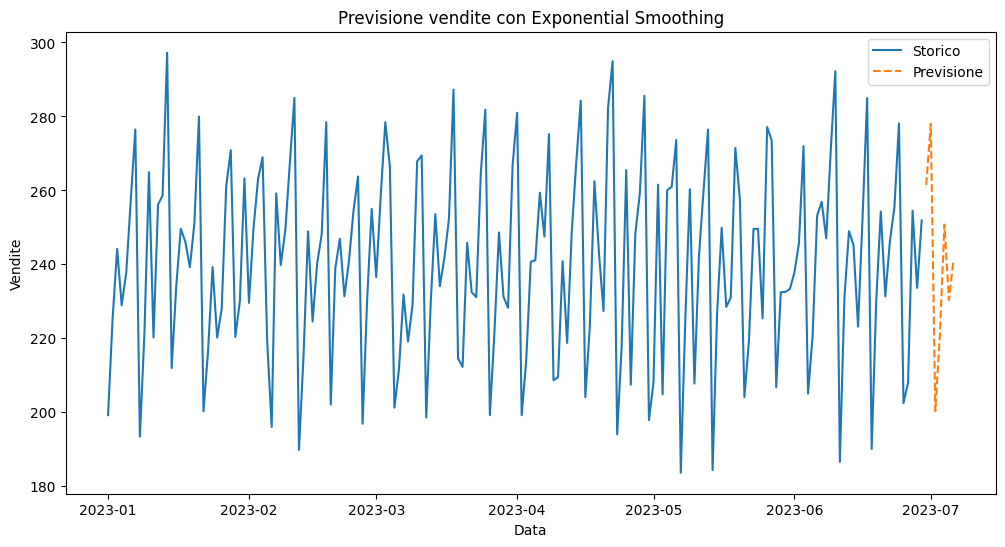

2023-06-30    261.479728
2023-07-01    277.979247
2023-07-02    200.320248
2023-07-03    220.922832
2023-07-04    250.746752
2023-07-05    230.380778
2023-07-06    241.237763
Freq: D, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assumiamo che df sia già definito
df = df.sort_index()  # Ordiniamo le date se necessario
df = df.asfreq("D")   # Forziamo la frequenza giornaliera

# Modello di Exponential Smoothing con trend e stagionalità settimanale
model = ExponentialSmoothing(df["sales"], trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()

# Previsione per i prossimi 7 giorni
forecast = fit.forecast(steps=7)

# Grafico della serie storica + previsione
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="sales", label="Storico")
sns.lineplot(x=forecast.index, y=forecast, label="Previsione", linestyle="dashed")
plt.title("Previsione vendite con Exponential Smoothing")
plt.xlabel("Data")
plt.ylabel("Vendite")
plt.legend()
plt.show()

# Stampiamo la previsione
print(forecast)

2.1 Ci assicuriamo che i dati siano ordinati correttamente e abbiano una frequenza temporale ben definita: sort_index() ordina le date in ordine crescente per evitare problemi con il modello, asfreq("D") imposta esplicitamente la frequenza giornaliera, che è essenziale per il modello di Exponential Smoothing;

2.2 Applichiamo il modello di Exponential Smoothing, che tiene conto di trend e stagionalità settimanale: trend="add" aggiunge un componente lineare che cattura una crescita/diminuzione nelle vendite, seasonal="add" considera una stagionalità additiva, utile quando le variazioni stagionali hanno un'ampiezza costante, seasonal_periods=7 definisce una periodicità di 7 giorni (tipico per i dati giornalieri con pattern settimanali), .fit() adatta il modello ai dati storici;

2.3 Per quanto riguarda le previsioni forecast(steps=7) genera 7 valori futuri basandosi sul modello allenato;

2.4 La serie storica viene confrontata con la previsione usando un grafico a linee;

2.5 Per vedere i valori previsti per i prossimi 7 giorni usiamo print(forecast).